# Activity Recognition using Cell Phone Accelerometers
## by Jennifer R. Kwapisz, Gary M. Weiss, Samuel A. Moore
### Data mining

In [1]:
# Loading all the needed modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)

In [2]:
root = '/Users/samiadrappeau/data_science/projets_perso/liberty_rider/'
dirin = 'WISDM/data_WISDM/'
fid = root + dirin + 'WISDM_ar_v1.1_raw.txt'

In [3]:
# Loading data
df = pd.read_csv(fid, lineterminator=';' ,
    header=None ,names=['user','activity','timestamp','xaccel','yaccel','zaccel', 'NA'])
del df ['NA']

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('Shape of data frame is:', df.shape, sep=" ")

Shape of data frame is: (1098208, 6)


In [5]:
df[['xaccel', 'yaccel', 'zaccel']].describe()

,xaccel,yaccel,zaccel
count,1.098208e+06,1.098208e+06,1.098208e+06
mean,6.628650e-01,7.255622e+00,4.110796e-01
std,6.849046e+00,6.746217e+00,4.754122e+00
min,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,-2.870000e+00,3.170000e+00,-2.220000e+00
50%,2.700000e-01,7.930000e+00,0.000000e+00
75%,4.440000e+00,1.156000e+01,2.720000e+00
max,1.995000e+01,2.004000e+01,1.961000e+01


In [6]:
df.head()

,user,activity,timestamp,xaccel,yaccel,zaccel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [48]:
def create_segments(df):
    ''' Convert timestamp to second, sort by user and time and create 10-second segments
    '''
    # Converting timestamp in nano-second to second
    df['time_seconds'] = df['timestamp']*1e-9
    # Sorting data by user and timestamp
    df = df.sort_values(by=['user', 'time_seconds'])
    # create segments
    segment_length = 200
    df['seq'] = range(df.shape[0])
    df['segment'] = df.groupby(['user','activity'])['seq'].apply(lambda x: x%segment_length == 0).fillna(0).cumsum()
    return df

In [49]:
df_segmented = create_segments(df)

In [52]:
df_segmented.head()

,user,activity,timestamp,xaccel,yaccel,zaccel,time_seconds,seq,segment
941964,1,Walking,4991922345000,0.69,10.80,-2.03,4991.922345,0,1
941965,1,Walking,4991972333000,6.85,7.44,-0.50,4991.972333,1,1
941966,1,Walking,4992022351000,0.93,5.63,-0.50,4992.022351,2,1
941967,1,Walking,4992072339000,-2.11,5.01,-0.69,4992.072339,3,1
941968,1,Walking,4992122358000,-4.59,4.29,-1.95,4992.122358,4,1


(-500000000.0, 200000000.0)

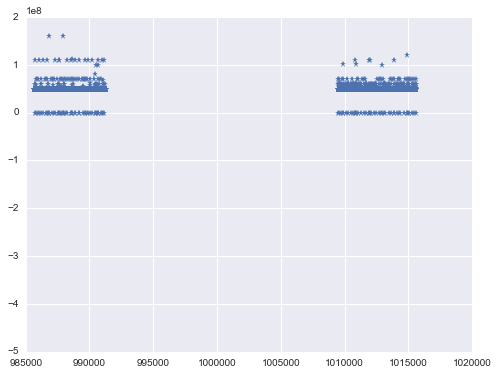

In [53]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(df_segmented.loc[(df_segmented['user'] == 2) & (df_segmented['activity'] == 'Walking')]['timestamp'].diff(), '*')
ax1.set_ylim([-0.5*1e9,0.2*1e9])

In [54]:
print('Shape of data frame is now:', df_segmented.shape, sep=" ")

Shape of data frame is now: (1098208, 9)


In [55]:
df_segmented.head(201)

,user,activity,timestamp,xaccel,yaccel,zaccel,time_seconds,seq,segment
941964,1,Walking,4991922345000,0.69,10.80,-2.03,4991.922345,0,1
941965,1,Walking,4991972333000,6.85,7.44,-0.50,4991.972333,1,1
941966,1,Walking,4992022351000,0.93,5.63,-0.50,4992.022351,2,1
941967,1,Walking,4992072339000,-2.11,5.01,-0.69,4992.072339,3,1
941968,1,Walking,4992122358000,-4.59,4.29,-1.95,4992.122358,4,1
941969,1,Walking,4992172376000,12.41,11.18,7.82,4992.172376,5,1
941970,1,Walking,4992222333000,17.27,11.60,5.94,4992.222333,6,1
941971,1,Walking,4992272321000,1.42,8.43,-5.28,4992.272321,7,1
941972,1,Walking,4992322339000,-2.68,15.89,-0.38,4992.322339,8,1
941973,1,Walking,4992372327000,-1.38,9.92,-1.99,4992.372327,9,1


In [47]:
# Extracting a user activity
df_user = df_segmented[df_segmented.user == 33]

In [48]:
print(df_user.head())
print(df_user.shape)

        user  activity     timestamp  xaccel  yaccel  zaccel  time_seconds  \
462771    33  Standing  504382335000    0.11    9.89    1.46    5043.82335   
462772    33  Standing  504432262000    0.11    9.92    1.46    5044.32262   
462773    33  Standing  504482280000    0.08    9.92    1.46    5044.82280   
462774    33  Standing  504532298000    0.04    9.89    1.46    5045.32298   
462775    33  Standing  504582316000    0.08    9.92    1.46    5045.82316   

           seq  segment  
462771  978152     4891  
462772  978153     4891  
462773  978154     4891  
462774  978155     4891  
462775  978156     4891  
(29453, 9)


In [49]:
df_user_activity = df_user[df_user.activity == 'Sitting']

In [50]:
print(df_user_activity.head())
print(df_user_activity.shape)

        user activity     timestamp  xaccel  yaccel  zaccel  time_seconds  \
464383    33  Sitting  612432323000    4.99    3.02    7.86    6124.32323   
464384    33  Sitting  612482402000    5.22    3.26    8.05    6124.82402   
464385    33  Sitting  612532329000    5.24    3.15    8.16    6125.32329   
464386    33  Sitting  612582378000    5.33    3.57    8.05    6125.82378   
464387    33  Sitting  612632365000    5.63    2.98    7.46    6126.32365   

           seq  segment  
464383  979764     4899  
464384  979765     4899  
464385  979766     4899  
464386  979767     4899  
464387  979768     4899  
(3248, 9)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116b41748>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x1167de630>]], dtype=object)

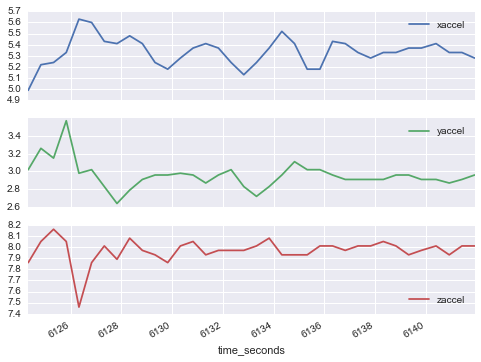

In [51]:
df_user_activity[df_user_activity.segment==4899].plot(x='time_seconds', y=['xaccel',  'yaccel',  'zaccel'], subplots=True, layout=[3,1])

In [62]:
df_user_activity[df_user_activity.segment==4899][['xaccel','yaccel', 'zaccel']].describe()

,xaccel,yaccel,zaccel
count,36.000000,36.000000,36.000000
mean,5.335000,2.956944,7.969167
std,0.126728,0.152593,0.109215
min,4.990000,2.640000,7.460000
25%,5.240000,2.910000,7.930000
50%,5.330000,2.960000,7.990000
75%,5.410000,2.990000,8.010000
max,5.630000,3.570000,8.160000


In [63]:
print(len(df_segmented['segment'].unique()),len(df_segmented['user'].unique()))
range((df_segmented['segment'].unique()).shape[0])

5492 36


range(0, 5492)

In [124]:
def create_new_features(df_old):
    # Sorting data by user and segment
    accel_cols = ['xaccel','yaccel','zaccel']
    df_new = df_old.loc[:,accel_cols+['user','segment']].groupby(['user', 'segment'])
    
    # acceleration means
    means = df_new[accel_cols].apply(lambda x: np.mean(x))
    
    # acceleration standard deviation
    sds = df_new[accel_cols].apply(lambda x: np.std(x))
    
    # avg absolute difference
    avg_absolute_diff_1 = df_new[accel_cols[0]].apply(lambda x: np.mean(np.absolute(x-np.mean(x))))
    avg_absolute_diff_2 = df_new[accel_cols[1]].apply(lambda x: np.mean(np.absolute(x-np.mean(x))))
    avg_absolute_diff_3 = df_new[accel_cols[2]].apply(lambda x: np.mean(np.absolute(x-np.mean(x))))
    avg_absolute_diffs = [ avg_absolute_diff_1, avg_absolute_diff_2, avg_absolute_diff_3 ]
    
    # avg resultant accel
    #avg_resultant_accel = df_new[accel_cols].apply(lambda x: np.mean(np.sqrt(x.iloc[:,0]**2+ x.iloc[:,1]**2+ x.iloc[:,2]**2)))
    
    # time between peaks
    between_peaks_1 = df_new[accel_cols[0]].apply(lambda x: np.abs(np.argmax(x)-np.argmin(x)))
    between_peaks_2 = df_new[accel_cols[1]].apply(lambda x: np.abs(np.argmax(x)-np.argmin(x)))
    between_peaks_3 = df_new[accel_cols[2]].apply(lambda x: np.abs(np.argmax(x)-np.argmin(x)))
    between_peaks = [ between_peaks_1, between_peaks_2, between_peaks_3 ]
    
    
    # concat columns
    X = pd.concat([means, sds] + avg_absolute_diffs + between_peaks, axis=1, keys=['xavg', 'yavg', 'zavg','xstanddev','ystanddev', 'zstanddev','xabsdiff', 'yabsdiff', 'zabsdiff', 'xpeak', 'ypeak', 'zpeak'])
    
    # Create new dataframe
    #df_new = pd.DataFrame(columns=('user', 'activity', 'xavg', 'yavg', 'zavg', 'xstanddev','ystanddev', 'zstanddev',\
    #                              'xabsdiff', 'yabsdiff', 'zabsdiff', 'resultant', 'xpeak', 'ypeak', 'zpeak',\
    #                              'x0','x1','x2','x3','x4','x5','x6','x7','x8','x9',\
    #                              'y0','y1','y2','y3','y4','y5','y6','y7','y8','y9',\
    #                              'z0','z1','z2','z3','z4','z5','z6','z7','z8','z9'))

    
    #df_new['id'] = range((df_old['segment'].unique()).shape[0])
    #df_new['segment'] = df_tmp.groupby(['user','activity','segment']).apply(lambda x: x%segment_length == 0).fillna(0).cumsum()
    
    return X

In [125]:
df_new = create_new_features(df_segmented)

In [127]:
df_new.dtypes

xavg       xaccel    float64
           yaccel    float64
           zaccel    float64
yavg       xaccel    float64
           yaccel    float64
           zaccel    float64
zavg       xaccel    float64
xstanddev  yaccel    float64
ystanddev  zaccel    float64
zstanddev  xaccel      int64
xabsdiff   yaccel      int64
yabsdiff   zaccel      int64
dtype: object

In [74]:
df_segmented.head(20)

,user,activity,timestamp,xaccel,yaccel,zaccel,time_seconds,seq,segment
941964,1,Walking,4991922345000,0.69,10.80,-2.03,4991.922345,0,1
941965,1,Walking,4991972333000,6.85,7.44,-0.50,4991.972333,1,1
941966,1,Walking,4992022351000,0.93,5.63,-0.50,4992.022351,2,1
941967,1,Walking,4992072339000,-2.11,5.01,-0.69,4992.072339,3,1
941968,1,Walking,4992122358000,-4.59,4.29,-1.95,4992.122358,4,1
941969,1,Walking,4992172376000,12.41,11.18,7.82,4992.172376,5,1
941970,1,Walking,4992222333000,17.27,11.60,5.94,4992.222333,6,1
941971,1,Walking,4992272321000,1.42,8.43,-5.28,4992.272321,7,1
941972,1,Walking,4992322339000,-2.68,15.89,-0.38,4992.322339,8,1
941973,1,Walking,4992372327000,-1.38,9.92,-1.99,4992.372327,9,1


In [106]:
df_new.head()

,xaccel,yaccel,zaccel,user,segment
941964,0.69,10.80,-2.030000,1,1
941965,6.85,7.44,-0.500000,1,1
941966,0.93,5.63,-0.500000,1,1
941967,-2.11,5.01,-0.690000,1,1
941968,-4.59,4.29,-1.950000,1,1
942164,6.17,6.13,-1.650000,1,2
942165,4.82,6.70,-0.190000,1,2
942166,3.60,10.61,0.420000,1,2
942167,6.09,11.88,1.180000,1,2
942168,10.38,9.77,1.800000,1,2
